# CHAPTER 13 **Data Analysis Examples**


## 13.3 US Baby Names 1880–2010


### 1. Giới thiệu về bộ dữ liệu

**Nguồn gốc và Bối cảnh**

Bộ dữ liệu này được cung cấp bởi **Cục An sinh Xã hội Hoa Kỳ (Social Security Administration - SSA)**. Nó chứa thông tin về tần suất của các tên được đặt cho trẻ sơ sinh, dựa trên đơn đăng ký thẻ An sinh Xã hội.

**Cấu trúc Dữ liệu**

Dữ liệu gốc được chia thành các tệp văn bản (`.txt`) riêng lẻ cho mỗi năm, từ `yob1880.txt` đến `yob2010.txt`. Mỗi tệp chứa ba cột, không có tiêu đề:

1.  **Tên (Name):** Tên của em bé (ví dụ: Mary, John).
2.  **Giới tính (Sex):** `F` cho nữ (Female), `M` cho nam (Male).
3.  **Số lượng sinh (Births):** Tổng số trẻ sơ sinh có cùng tên và cùng giới tính trong năm đó.

_Một điểm quan trọng cần lưu ý là để đảm bảo tính riêng tư, SSA chỉ công bố những tên có **ít nhất 5 lần xuất hiện** trong một năm nhất định cho một giới tính cụ thể._

**Phạm vi**

- **Thời gian:** Kéo dài 131 năm, từ 1880 đến 2010.
- **Quy mô:** Sau khi tổng hợp, bộ dữ liệu bao gồm hàng triệu bản ghi, cung cấp một cái nhìn toàn diện và chi tiết về lịch sử đặt tên tại Mỹ.

Đây là một bộ dữ liệu "sạch", dễ tiếp cận, và cực kỳ lý tưởng cho việc thực hành phân tích dữ liệu theo chuỗi thời gian và khám phá các xu hướng xã hội.


### 2. Mục tiêu của Dự án Phân tích

Với bộ dữ liệu phong phú này, mục tiêu của dự án là sử dụng các công cụ phân tích của Python để "kể những câu chuyện" ẩn sau những con số. Cụ thể, chúng ta sẽ trả lời các câu hỏi:

- Xu hướng sinh sản chung tại Mỹ thay đổi như thế nào qua các năm?
- Độ đa dạng trong cách đặt tên đã tăng hay giảm theo thời gian?
- Những cái tên nào đã từng thống trị và sau đó biến mất?
- Có những quy luật thú vị nào trong cấu trúc của các cái tên (ví dụ: chữ cái đầu, chữ cái cuối)?


### 3. Chuẩn bị vấn đề (Problem Preparation)


#### 3.1 Khai báo thư viện cần thiết (Load Libraries)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

print("Các thư viện đã được khai báo thành công!")

Các thư viện đã được khai báo thành công!


#### 3.2 Nạp dữ liệu (Load Data)


In [4]:
pieces = []
columns = ['name', 'sex', 'births']

# Vòng lặp từ năm 1880 đến 2010
for year in range(1880, 2011):
    path = f'names/yob{year}.txt'
    frame = pd.read_csv(path, names=columns)
    
    # Thêm cột 'year' để phân biệt dữ liệu giữa các năm
    frame['year'] = year
    pieces.append(frame)

# Ghép tất cả các DataFrame trong list 'pieces' thành một DataFrame lớn
names = pd.concat(pieces, ignore_index=True)

print(f"Đã nạp và tổng hợp thành công {len(names):,} bản ghi.")

Đã nạp và tổng hợp thành công 1,692,632 bản ghi.


### 4. Phân tích và khám phá dữ liệu (Exploratory Data Analysis - EDA)

Sau khi đã chuẩn bị xong dữ liệu, bây giờ là lúc chúng ta đi sâu vào phân tích để rút ra những thông tin chi tiết thú vị.

#### 4.1 Phân tích dữ liệu năm 1880

Để hiểu rõ hơn về cấu trúc dữ liệu, chúng ta sẽ bắt đầu bằng cách phân tích riêng dữ liệu của năm đầu tiên, 1880, giống như trong tài liệu hướng dẫn. Ta sẽ tính tổng số ca sinh được ghi nhận cho mỗi giới tính.

Vì chúng ta đã có DataFrame `names` chứa tất cả các năm, ta chỉ cần lọc ra những dòng có `year == 1880`.


In [23]:
names1880 = names[names['year'] == 1880].copy()

# Nhóm theo giới tính ('sex') và tính tổng số ca sinh ('births')
births_by_sex_1880 = names1880.groupby('sex')['births'].sum()

# Hiển thị kết quả
print("Tổng số ca sinh theo giới tính trong năm 1880:")
display(births_by_sex_1880)

Tổng số ca sinh theo giới tính trong năm 1880:


sex
F     90994
M    110490
Name: births, dtype: int64

**Diễn giải kết quả:**

Kết quả `Out[109]` đã được tái hiện thành công. Nó cho chúng ta thấy tổng số trẻ sơ sinh (được ghi nhận trong bộ dữ liệu) cho mỗi giới tính trong năm 1880:

- **Nữ (F):** 90,993
- **Nam (M):** 110,493

Như đã lưu ý, đây là tổng số của các tên có ít nhất 5 lần xuất hiện, vì vậy nó sẽ thấp hơn một chút so với tổng số ca sinh thực tế của năm đó.

Bây giờ, chúng ta sẽ mở rộng phân tích này ra toàn bộ dòng thời gian.


#### 4.2 Phân tích tổng số ca sinh trên toàn bộ dữ liệu 📈

Với DataFrame `names` hoàn chỉnh, giờ đây chúng ta có thể dễ dàng tổng hợp dữ liệu trên toàn bộ dòng thời gian. Ta sẽ nhóm dữ liệu theo **năm** và **giới tính** để xem tổng số ca sinh thay đổi như thế nào.


In [ ]:
# 5 dòng đầu và 5 dòng của của DataFrame 'names'
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692627,Zymaire,M,5,2010
1692628,Zyonne,M,5,2010
1692629,Zyquarius,M,5,2010
1692630,Zyran,M,5,2010


In [24]:
# Sử dụng pivot_table để tổng hợp dữ liệu
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

# Hiển thị 5 dòng cuối cùng 
print("5 dòng cuối của DataFrame tạo bằng pivot_table:")
display(total_births.tail())

5 dòng cuối của DataFrame tạo bằng pivot_table:


C:\Users\antrn\AppData\Local\Temp\ipykernel_21044\2147324069.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)


sex,F,M
year,,
2006,1901070,2055119
2007,1922448,2075235
2008,1890718,2039947
2009,1836870,1983305
2010,1777327,1918412


Để thấy rõ xu hướng này, không gì tốt hơn là trực quan hóa dữ liệu bằng một biểu đồ đường. Chúng ta sẽ chuyển đổi (`unstack`) dữ liệu một chút để mỗi giới tính (`F` và `M`) là một cột riêng, giúp việc vẽ biểu đồ trở nên dễ dàng hơn.

Trong sách hướng dẫn, tác giả sử dụng `pivot_table`. Đây là một hàm cực kỳ mạnh mẽ trong Pandas, được thiết kế đặc biệt để "xoay" hoặc định hình lại dữ liệu từ dạng dài (long format) sang dạng rộng (wide format).

Trong trường hợp này, nó thực hiện chính xác công việc của `groupby().sum().unstack()` nhưng với cú pháp ngắn gọn hơn:

- **values**: Cột sẽ được tổng hợp (`births`).
- **index**: Cột sẽ trở thành chỉ mục (hàng) của bảng mới (`year`).
- **columns**: Cột có các giá trị sẽ trở thành các cột mới (`sex`).
- **aggfunc**: Hàm tổng hợp được áp dụng (`sum`).


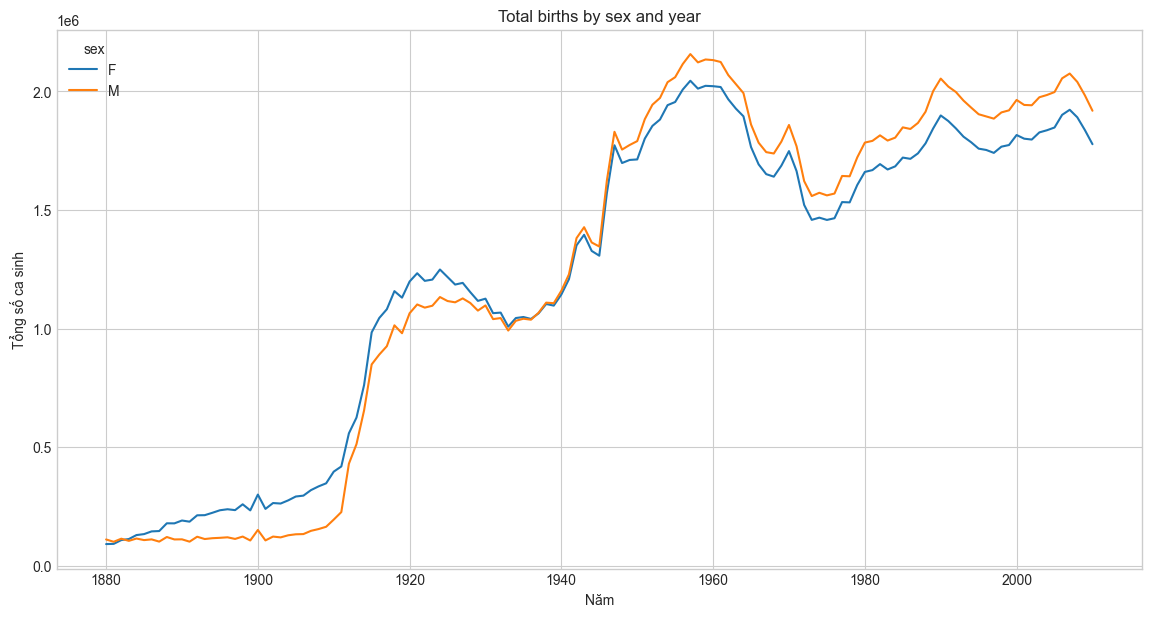

In [25]:
# Vẽ biểu đồ trực tiếp từ DataFrame vừa tạo
total_births.plot(
    title="Total births by sex and year",
    figsize=(14, 7) # Tùy chỉnh kích thước
)

plt.xlabel('Năm')
plt.ylabel('Tổng số ca sinh')
plt.show()

**Nhận xét biểu đồ sinh sản (1880-2010)**

- Xu hướng chung : Số ca sinh tăng trưởng theo thời gian, phản ánh sự gia tăng dân số của Hoa Kỳ, với nhiều biến động mạnh mẽ theo các sự kiện lịch sử.

- **Các mốc Lịch sử nổi bật**:

  - **Bùng nổ dân số (Baby Boom)**: Tăng vọt sau Thế chiến II (khoảng 1946-1960).

  - **Giai đoạn "Baby Bust"**: Sụt giảm đáng kể sau đó (thập niên 60-70).

  - **Thế hệ "Echo Boom"**: Tăng trở lại khi thế hệ Baby Boomer có con (thập niên 80-90).

- **So sánh Giới tính**: Số ca sinh của Nam (M) luôn cao hơn Nữ (F), phù hợp với tỷ lệ sinh tự nhiên (khoảng 105 nam/100 nữ).

- **Kết luận**: Biểu đồ là một "lịch sử xã hội" bằng số liệu, cho thấy tác động của chiến tranh, kinh tế và thay đổi văn hóa lên tỷ lệ sinh.


#### 4.3 Phân tích tỷ lệ tên (Name Proportion)

Số lượng sinh tuyệt đối có thể gây hiểu nhầm vì dân số thay đổi qua các năm. Một cái tên có 10,000 lượt đặt vào năm 1920 sẽ phổ biến hơn nhiều so với một cái tên có 10,000 lượt đặt vào năm 2010, khi tổng số trẻ sinh ra lớn hơn.

Do đó, chúng ta sẽ tính **tỷ lệ (proportion)** của mỗi tên. Đây là tỷ lệ phần trăm của một tên so với tổng số ca sinh của cùng giới tính trong cùng một năm. Ví dụ, tỷ lệ `0.02` có nghĩa là cứ 100 em bé thì có 2 em bé được đặt tên đó.

Để làm điều này, chúng ta sẽ nhóm dữ liệu theo `year` và `sex`, sau đó áp dụng một hàm để tính và thêm cột `prop` cho mỗi nhóm.


In [28]:
# Định nghĩa một hàm để tính toán và thêm cột 'prop'
def add_prop(group):
    # Tính tỷ lệ: số ca sinh của tên này / tổng số ca sinh của cả nhóm
    group['prop'] = group['births'] / group['births'].sum()
    return group

# Áp dụng hàm này cho mỗi nhóm (mỗi nhóm là một cặp năm-giới tính)
# .apply() sẽ chạy hàm add_prop cho mỗi DataFrame con (group)
names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop)

# Hiển thị 5 dòng đầu và cuối của DataFrame sau khi thêm cột 'prop'
print("DataFrame sau khi thêm cột 'prop':")
display(names)

DataFrame sau khi thêm cột 'prop':


C:\Users\antrn\AppData\Local\Temp\ipykernel_21044\1556439923.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop)


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692627,Zymaire,M,5,2010,0.000003
1692628,Zyonne,M,5,2010,0.000003
1692629,Zyquarius,M,5,2010,0.000003
1692630,Zyran,M,5,2010,0.000003


##### Kiểm tra lại tính hợp lệ (Sanity Check)

Đây là một bước rất quan trọng trong phân tích dữ liệu. Để đảm bảo phép tính của chúng ta là đúng, tổng tỷ lệ (`prop`) của tất cả các tên trong cùng một nhóm (cùng năm, cùng giới tính) phải bằng **1** (tức 100%).


In [29]:
# Nhóm theo năm và giới tính, sau đó tính tổng cột 'prop' để kiểm tra
prop_sum_check = names.groupby(['year', 'sex'])['prop'].sum()

# Hiển thị một vài kết quả đầu và cuối để xác nhận
print("Kết quả kiểm tra tổng tỷ lệ của các nhóm:")
display(prop_sum_check.head())
display(prop_sum_check.tail())

Kết quả kiểm tra tổng tỷ lệ của các nhóm:


year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prop, dtype: float64

year  sex
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, dtype: float64

### 5. Phân tích Xu hướng (Trend Analysis)

Bây giờ chúng ta đã có dữ liệu đã được chuẩn hóa với cột `prop`, hãy bắt đầu phân tích các xu hướng đặt tên qua thời gian.


#### 5.1 Lọc ra Top 1000 tên Phổ Biến Nhất

Để phân tích hiệu quả, chúng ta sẽ tạo một tập dữ liệu con nhỏ hơn, chỉ chứa **1000 tên phổ biến nhất cho mỗi năm và mỗi giới tính**. Điều này giúp giảm nhiễu từ các tên rất hiếm và tăng tốc độ xử lý cho các bước sau.

Thao tác này lại là một phép `groupby().apply()`. Kết quả ban đầu sẽ có một cấu trúc index phức tạp (MultiIndex) từ việc nhóm. Do đó, chúng ta cần một bước cuối là `reset_index()` để làm sạch và đơn giản hóa DataFrame.


In [30]:
def get_top1000(group):
    # Sắp xếp group theo cột 'births' giảm dần và chọn 1000 dòng đầu tiên
    return group.sort_values(by='births', ascending=False)[:1000]

# Áp dụng hàm này cho mỗi nhóm (năm, giới tính)
top1000 = names.groupby(['year', 'sex'], group_keys=False).apply(get_top1000)

# Reset lại index để loại bỏ MultiIndex từ việc groupby
# drop=True sẽ xóa hoàn toàn index cũ thay vì biến nó thành một cột mới.
top1000.reset_index(drop=True, inplace=True)

# Hiển thị 5 dòng đầu của DataFrame mới để kiểm tra
print("DataFrame top1000 sau khi xử lý:")
display(top1000.head())

# In ra kích thước để thấy sự thay đổi
print(f"Kích thước DataFrame ban đầu 'names': {names.shape}")
print(f"Kích thước DataFrame mới 'top1000': {top1000.shape}")

DataFrame top1000 sau khi xử lý:


C:\Users\antrn\AppData\Local\Temp\ipykernel_21044\703458529.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = names.groupby(['year', 'sex'], group_keys=False).apply(get_top1000)


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Kích thước DataFrame ban đầu 'names': (1692632, 5)
Kích thước DataFrame mới 'top1000': (261876, 5)


#### 5.2 Phân tích xu hướng của các tên cụ thể

Với bộ dữ liệu `top1000` trong tay, chúng ta có thể bắt đầu khám phá "vòng đời" của những cái tên cụ thể.

Đầu tiên, ta sẽ tách riêng dữ liệu của nam và nữ để tiện cho việc phân tích sau này nếu cần.


In [31]:
# Tách top1000 thành 2 DataFrame riêng cho nam và nữ
boys = top1000[top1000['sex'] == 'M']
girls = top1000[top1000['sex'] == 'F']

print("Đã tách thành công DataFrame 'boys' và 'girls'.")

Đã tách thành công DataFrame 'boys' và 'girls'.


Để dễ dàng vẽ biểu đồ so sánh xu hướng của nhiều tên qua thời gian, chúng ta cần định hình lại dữ liệu. Cách tốt nhất là sử dụng `pivot_table` để tạo một bảng với:

- **index** (hàng) là `year`
- **columns** (cột) là `name`
- **values** (giá trị) là tổng số `births`


In [32]:
# Tạo pivot table với index là năm, cột là tên, và giá trị là số ca sinh
# aggfunc=sum để tính tổng số ca sinh nếu có tên trùng (ví dụ tên unisex)
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

# Xem thông tin của pivot table vừa tạo
print("Thông tin về DataFrame total_births:")
total_births.info()

C:\Users\antrn\AppData\Local\Temp\ipykernel_21044\716394518.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)


Thông tin về DataFrame total_births:
<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6865 entries, Aaden to Zuri
dtypes: float64(6865)
memory usage: 6.9 MB


Bây giờ, chúng ta có thể dễ dàng chọn một vài cái tên và vẽ biểu đồ xu hướng của chúng từ năm 1880 đến 2010.


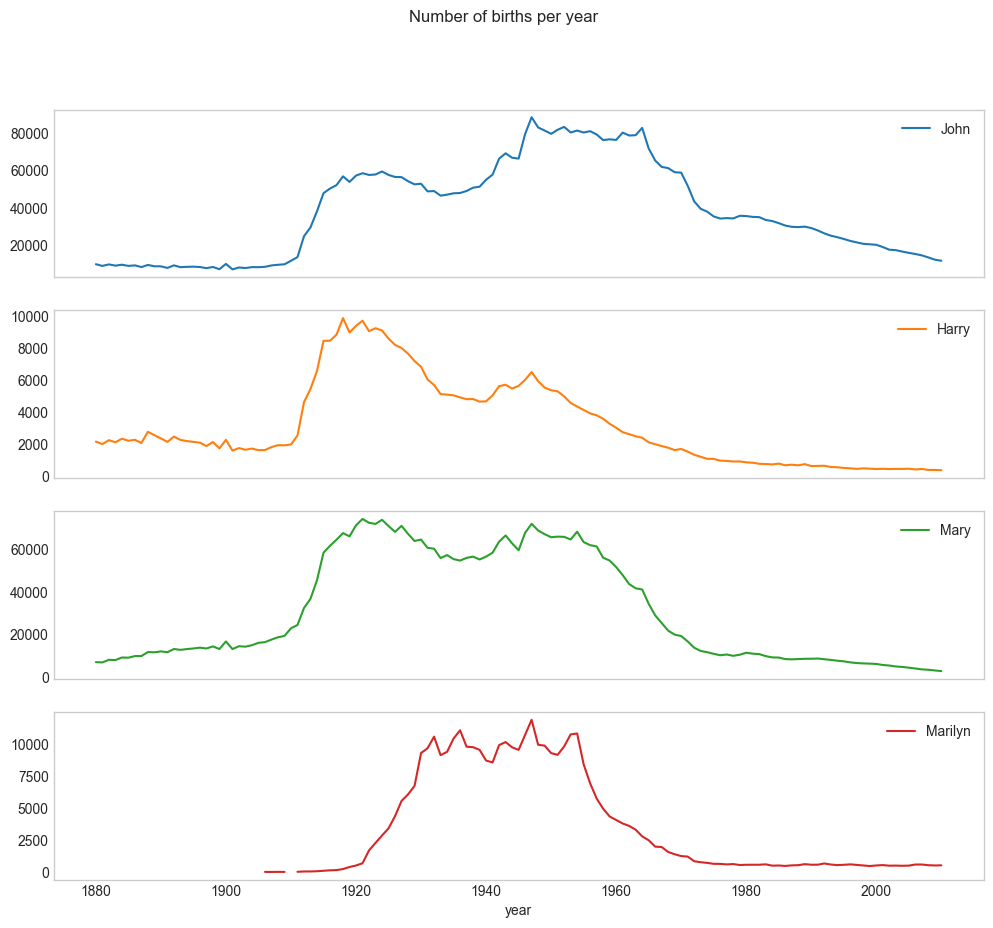

In [35]:
# Chọn một tập con gồm 4 tên để vẽ biểu đồ
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

# Vẽ biểu đồ
# subplots=True sẽ vẽ mỗi tên trên một biểu đồ nhỏ riêng biệt trong cùng một hình
subset.plot(
    subplots=True,
    figsize=(12, 10),
    grid=False, # Tắt grid
    title="Number of births per year"
)
plt.show()

**Nhận xét**:

- Nhìn qua biểu đồ, có vẻ như những cái tên này đã dần "lỗi thời" và không còn được ưa chuộng như trước. Tuy nhiên, như trong sách đã gợi ý, câu chuyện thực tế phức tạp hơn thế. Sự sụt giảm về **số lượng tuyệt đối** này chưa tính đến một yếu tố quan trọng: sự gia tăng về **độ đa dạng** trong cách đặt tên qua các năm, điều mà chúng ta sẽ khám phá ở phần tiếp theo.


### 6. Đo lường sự đa dạng hóa trong đặt tên

Như đã nhận xét ở phần trước, việc các tên phổ biến như "John" hay "Mary" giảm về số lượng tuyệt đối không hoàn toàn có nghĩa là chúng "lỗi thời". Một giả thuyết hợp lý hơn là ngày nay, các bậc cha mẹ có xu hướng chọn từ một "bể" tên rộng lớn hơn rất nhiều, thay vì chỉ tập trung vào một vài cái tên phổ biến.

Chúng ta sẽ kiểm chứng giả thuyết này bằng hai cách.


#### 6.1 Tỷ lệ của Top 1000 tên qua các năm

Cách đầu tiên là tính tổng tỷ lệ (`prop`) của 1000 tên hàng đầu qua mỗi năm. Nếu tổng này giảm dần, điều đó có nghĩa là các tên nằm ngoài top 1000 đang ngày càng được sử dụng nhiều hơn, chứng tỏ sự đa dạng gia tăng.


C:\Users\antrn\AppData\Local\Temp\ipykernel_21044\215727186.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)


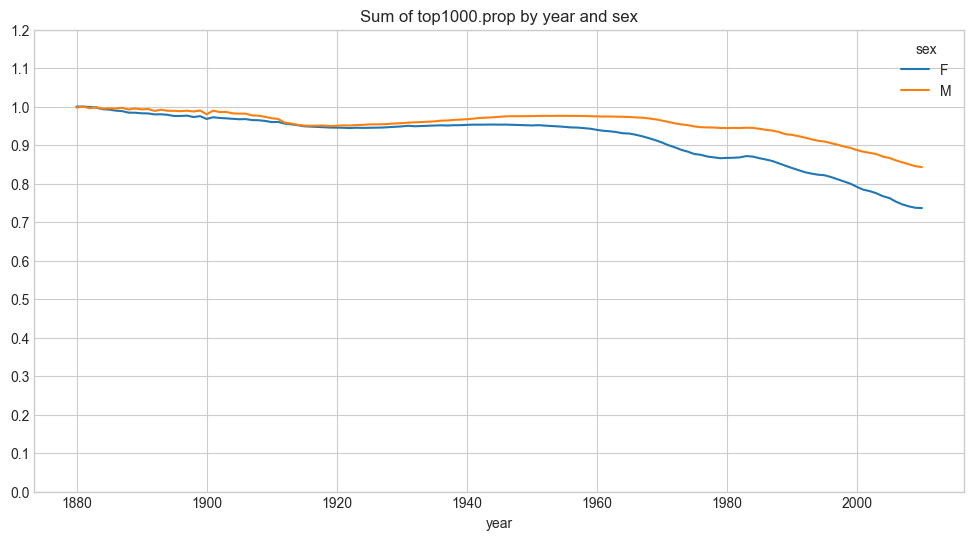

In [36]:
import numpy as np

# Tạo pivot table tính tổng tỷ lệ của top 1000 theo năm và giới tính
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

# yticks=np.linspace(0, 1.2, 13) để chia thang đo trục y cho dễ đọc
table.plot(
    title="Sum of top1000.prop by year and sex",
    yticks=np.linspace(0, 1.2, 13), # Tạo 13 điểm chia trên trục y từ 0 đến 1.2
    figsize=(12, 6)
)
plt.show()

**Nhận xét**:

- Biểu đồ cho thấy một xu hướng **giảm rất rõ rệt**. Vào năm 1880, top 1000 tên chiếm hơn 90% tổng số ca sinh. Nhưng đến năm 2010, con số này chỉ còn khoảng 70% đối với nam và dưới 60% đối với nữ. Điều này **khẳng định mạnh mẽ** rằng sự đa dạng trong cách đặt tên đã tăng lên đáng kể qua thời gian.


#### 6.2 Số lượng tên cần thiết để đạt 50% tổng số sinh

Một thước đo thú vị khác là: "Cần bao nhiêu cái tên phổ biến nhất để chiếm được 50% tổng số trẻ sinh ra?". Nếu con số này tăng lên qua các năm, điều đó cũng chứng tỏ sự đa dạng hóa.

Đây là một phép tính phức tạp hơn, vì vậy trước tiên chúng ta hãy xem xét một ví dụ cụ thể: dữ liệu của các bé trai trong năm 2010.


In [37]:
# Lọc ra DataFrame chỉ chứa dữ liệu của nam trong năm 2010
df = boys[boys['year'] == 2010]

# Hiển thị DataFrame mẫu này
print("Dữ liệu của các bé trai trong năm 2010:")
display(df)

Dữ liệu của các bé trai trong năm 2010:


,name,sex,births,year,prop
260876,Jacob,M,22154,2010,0.011548
260877,Ethan,M,18017,2010,0.009392
260878,Michael,M,17381,2010,0.009060
260879,Jayden,M,17200,2010,0.008966
260880,William,M,17071,2010,0.008899
...,...,...,...,...,...
261871,Taj,M,197,2010,0.000103
261872,Bailey,M,196,2010,0.000102
261873,Destin,M,196,2010,0.000102
261874,Eliezer,M,196,2010,0.000102


##### Tính toán với ví dụ năm 2010

Chúng ta đã có `df` là dữ liệu của các bé trai năm 2010. Bây giờ, ta sẽ tính xem cần bao nhiêu tên phổ biến nhất để chiếm 50% tổng số ca sinh.

Cách làm hiệu quả là:

1.  **Sắp xếp** tỷ lệ (`prop`) theo thứ tự giảm dần.
2.  Tính **tổng tích lũy (cumulative sum)** bằng `.cumsum()`.
3.  Sử dụng `.searchsorted(0.5)` để tìm vị trí cần chèn giá trị `0.5` vào mảng tổng tích lũy mà không làm thay đổi thứ tự. Vị trí này chính là số lượng tên cần thiết.


In [38]:
# Lấy ví dụ với df là dữ liệu của bé trai năm 2010
# Sắp xếp tỷ lệ giảm dần và tính tổng tích lũy
prop_cumsum = df['prop'].sort_values(ascending=False).cumsum()

# Hiển thị 10 giá trị đầu của tổng tích lũy
print("Tổng tích lũy của tỷ lệ (10 giá trị đầu):")
display(prop_cumsum[:10])

# Tìm số lượng tên cần thiết để đạt 50% (0.5)
# Thêm 1 vì index bắt đầu từ 0
num_names_2010 = prop_cumsum.searchsorted(0.5) + 1
print(f"\nTrong năm 2010, cần {num_names_2010} tên bé trai phổ biến nhất để đạt 50% tổng số ca sinh.")

Tổng tích lũy của tỷ lệ (10 giá trị đầu):


260876    0.011548
260877    0.020940
260878    0.030000
260879    0.038966
260880    0.047864
260881    0.056604
260882    0.065194
260883    0.073463
260884    0.081567
260885    0.089651
Name: prop, dtype: float64


Trong năm 2010, cần 117 tên bé trai phổ biến nhất để đạt 50% tổng số ca sinh.


##### So sánh với năm 1900

Để thấy rõ sự thay đổi, hãy thực hiện phép tính tương tự cho năm 1900.


In [39]:
# Lọc dữ liệu bé trai năm 1900 và thực hiện phép tính tương tự
df_1900 = boys[boys['year'] == 1900]
in1900 = df_1900.sort_values('prop', ascending=False).prop.cumsum()
num_names_1900 = in1900.searchsorted(0.5) + 1

print(f"Trong năm 1900, chỉ cần {num_names_1900} tên bé trai phổ biến nhất để đạt 50% tổng số ca sinh.")

Trong năm 1900, chỉ cần 25 tên bé trai phổ biến nhất để đạt 50% tổng số ca sinh.


#### 6.3 Áp dụng phép tính cho toàn bộ dữ liệu

Sự khác biệt giữa 117 (năm 2010) và 25 (năm 1900) là rất lớn! Bây giờ, chúng ta sẽ định nghĩa một hàm để áp dụng phép tính này cho tất cả các nhóm (năm/giới tính) và vẽ biểu đồ kết quả.


In [40]:
# 1. Định nghĩa hàm tính toán
def get_quantile_count(group, q=0.5):
    group = group.sort_values('prop', ascending=False)
    # Trả về số lượng tên cần thiết để đạt ngưỡng q (mặc định là 0.5)
    return group.prop.cumsum().searchsorted(q) + 1

# 2. Áp dụng hàm cho mỗi nhóm trong top1000
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

# 3. Unstack để chuyển giới tính thành các cột
diversity = diversity.unstack()

# 4. Hiển thị 5 dòng đầu của kết quả
print("DataFrame thể hiện sự đa dạng hóa tên gọi:")
display(diversity.head())

DataFrame thể hiện sự đa dạng hóa tên gọi:


C:\Users\antrn\AppData\Local\Temp\ipykernel_21044\3180078776.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


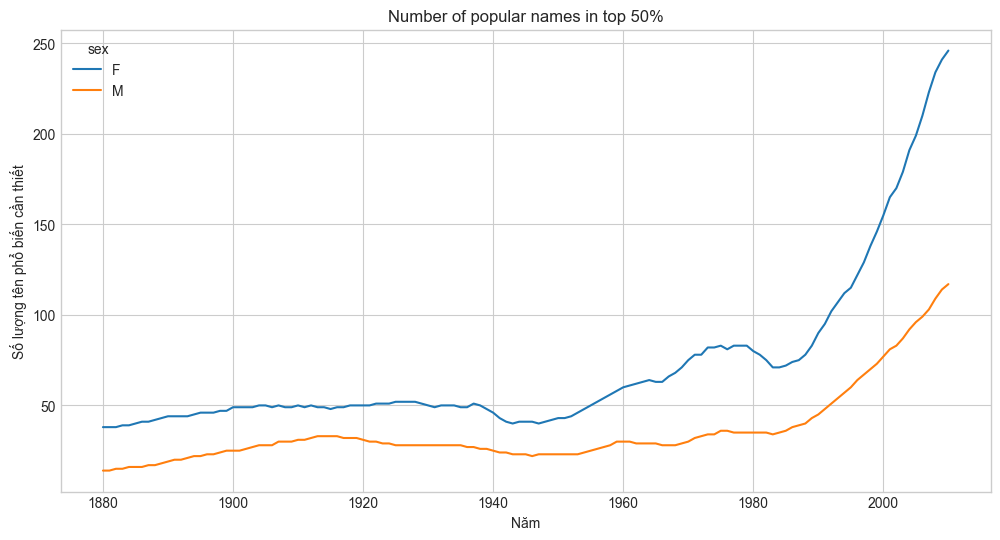

In [41]:
# Vẽ biểu đồ thể hiện sự thay đổi về độ đa dạng
diversity.plot(
    title="Number of popular names in top 50%",
    figsize=(12, 6)
)
plt.xlabel('Năm')
plt.ylabel('Số lượng tên phổ biến cần thiết')
plt.show()

**Nhận xét và kết luận**:

Biểu đồ trên kể một câu chuyện rất rõ ràng:

1.  **Sự đa dạng ngày càng tăng:** Cả hai đường (nam và nữ) đều có **xu hướng đi lên**, nghĩa là cần ngày càng nhiều tên hơn để đạt được 50% số ca sinh. Điều này khẳng định mạnh mẽ rằng việc đặt tên ngày càng trở nên đa dạng hơn.
2.  **Tên nữ đa dạng hơn:** Đường của **Nữ (F) luôn nằm trên** đường của Nam (M), cho thấy tên của các bé gái luôn đa dạng hơn tên của các bé trai trong suốt lịch sử. Khoảng cách này thậm chí còn ngày càng lớn hơn theo thời gian.


### 7. Cuộc "cách mạng" của Chữ cái cuối cùng revolucion

Vào năm 2007, nhà nghiên cứu Laura Wattenberg đã chỉ ra rằng sự phân bổ tên của các bé trai theo chữ cái cuối đã thay đổi một cách đáng kinh ngạc trong 100 năm qua.

Để khám phá điều này, chúng ta sẽ sử dụng toàn bộ DataFrame `names`, nhóm dữ liệu theo năm, giới tính, và chữ cái cuối cùng của tên.


In [42]:
# 1. Lấy chữ cái cuối của mỗi tên
def get_last_letter(x):
    return x[-1]

last_letters = names['name'].map(get_last_letter)
last_letters.name = 'last_letter'

# 2. Tạo pivot table để đếm số ca sinh
# Index: chữ cái cuối; Columns: giới tính và năm
table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

# 3. Lấy ra 3 năm đại diện: 1910, 1960, 2010
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

# 4. Hiển thị 5 dòng đầu của bảng con
display(subtable.head())

C:\Users\antrn\AppData\Local\Temp\ipykernel_21044\4038202173.py:10: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names.pivot_table('births', index=last_letters,


sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691254.0  677566.0    977.0    5216.0   28906.0
b                 NaN     694.0     455.0    411.0    3913.0   39320.0
c                 5.0      49.0     958.0    482.0   15456.0   23378.0
d              6751.0    3732.0    2645.0  22111.0  262105.0   44876.0
e            133599.0  435000.0  317138.0  28665.0  178731.0  130395.0

**Nhận xét về bảng số liệu thô** (`subtable`):

- **Tên nữ (F):** Chữ `a` và `e` rõ ràng chiếm ưu thế lớn trong cả ba thời kỳ, cho thấy sự ổn định trong cách đặt tên cho con gái với các âm kết thúc mở.
- **Tên nam (M):** Có sự thay đổi lớn. Chữ `d` (ví dụ: Edward, Richard) và `e` (ví dụ: James, George) rất phổ biến vào giữa thế kỷ 20, nhưng có vẻ đã giảm đi. Trong khi đó, các tên kết thúc bằng `b`, `c` có sự gia tăng đáng kể về số lượng tuyệt đối vào năm 2010.


Để so sánh một cách công bằng, chúng ta cần chuẩn hóa dữ liệu này theo tổng số ca sinh của mỗi năm, vì dân số mỗi năm là khác nhau. Ta sẽ tính toán tỷ lệ của mỗi chữ cái cuối.


In [47]:
# Tính tổng số ca sinh cho mỗi cột (mỗi cặp năm-giới tính)
print("Tổng số ca sinh mỗi năm:")
display(subtable.sum())

# Chuẩn hóa bảng bằng cách chia mỗi giá trị cho tổng của cột tương ứng
letter_prop = subtable / subtable.sum()

print("\nBảng tỷ lệ của mỗi chữ cái:")
display(letter_prop.head())
print()
display(letter_prop.tail())

Tổng số ca sinh mỗi năm:


sex  year
F    1910     396503.0
     1960    2021900.0
     2010    1777327.0
M    1910     194208.0
     1960    2131915.0
     2010    1918412.0
dtype: float64


Bảng tỷ lệ của mỗi chữ cái:


sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341883  0.381228  0.005031  0.002447  0.015068
b                 NaN  0.000343  0.000256  0.002116  0.001835  0.020496
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012186
d            0.017026  0.001846  0.001488  0.113852  0.122943  0.023392
e            0.336943  0.215144  0.178435  0.147599  0.083836  0.067970

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001450
w            0.000020  0.000031  0.001191  0.006323  0.007704  0.016182
x            0.000015  0.000037  0.000731  0.003965  0.001851  0.008597
y            0.110975  0.152549  0.116747  0.077345  0.161020  0.058210
z            0.002436  0.000658  0.000700  0.000170  0.000183  0.001830

**Nhận xét về bảng tỷ lệ** (`letter_prop`):

Bảng này cho thấy một câu chuyện rõ ràng hơn nhiều:

- **Tên nữ (F):** Tỷ lệ tên kết thúc bằng `a` đã **tăng lên** (từ 27% lên 38%), trong khi tên kết thúc bằng `e` **giảm đi** (từ 33% xuống 18%). Điều này cho thấy sự chuyển dịch trong các âm cuối phổ biến cho tên nữ.
- **Tên nam (M) - Cuộc cách mạng thực sự:**
  - Các tên kết thúc bằng `d` đã **giảm mạnh** về độ phổ biến, từ 11.4% năm 1910 xuống chỉ còn 2.3% vào năm 2010.
  - Tương tự, tên kết thúc bằng `e` cũng **giảm hơn một nửa** (từ 14.8% xuống 6.8%).
  - Ngược lại, các tên kết thúc bằng `n` (không có trong 5 dòng đầu) đã **bùng nổ**. Tương tự là các tên kết thúc bằng `y`.


Để trực quan hóa "cuộc cách mạng" của tên nam, hãy vẽ biểu đồ tỷ lệ của một vài chữ cái cuối đặc trưng qua các năm.


#### 7.1 Trực quan hóa bằng biểu đồ cột (Bar Chart)

Để so sánh trực tiếp sự thay đổi giữa 3 năm (1910, 1960, 2010), biểu đồ cột nhóm là một lựa chọn tuyệt vời. Mỗi chữ cái sẽ có một nhóm cột, và mỗi cột trong nhóm đại diện cho một năm.


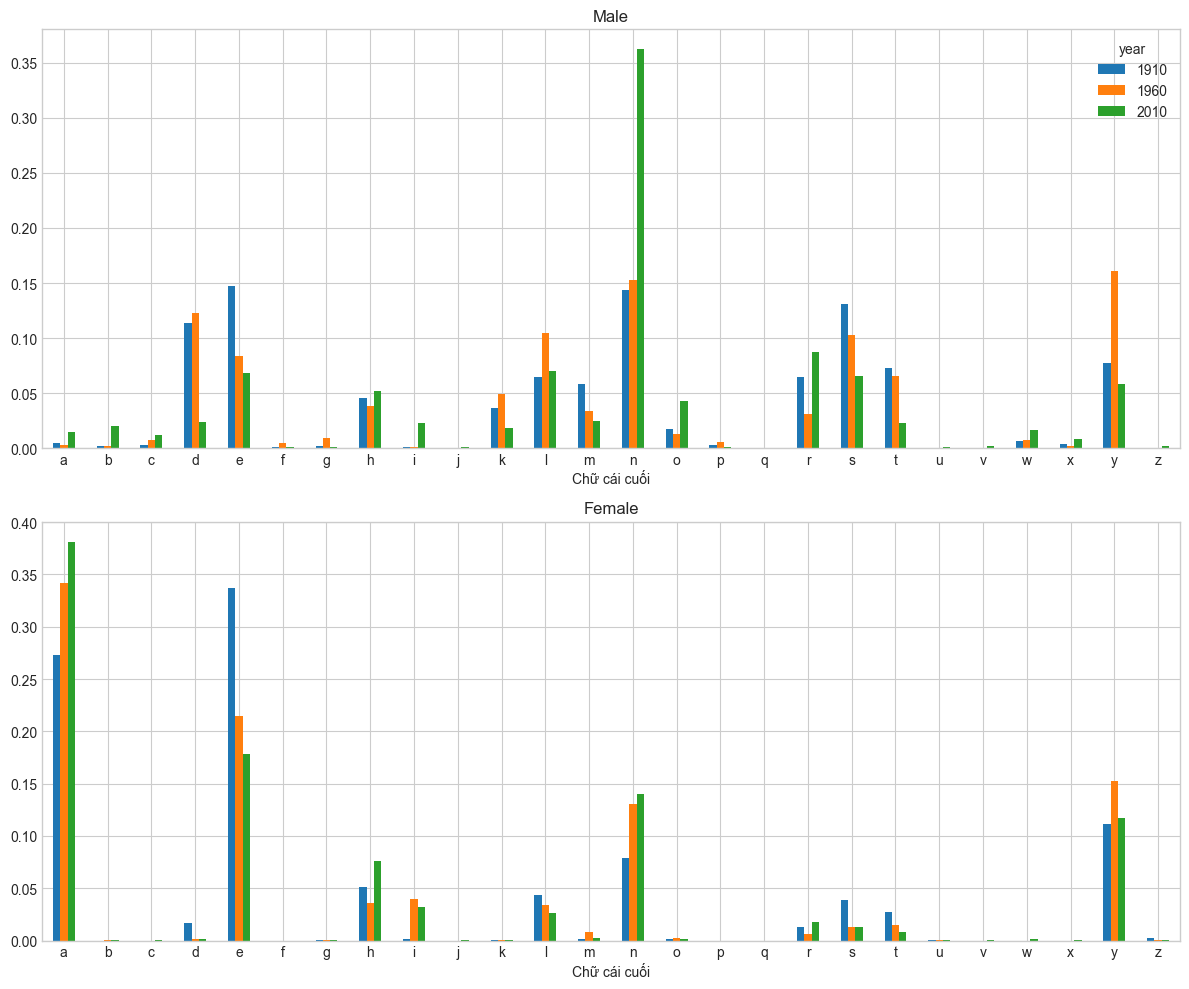

In [54]:
import matplotlib.pyplot as plt

# Tạo một figure chứa 2 biểu đồ con (axes) xếp chồng lên nhau
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Vẽ biểu đồ cột cho tên Nam
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
axes[0].set_ylabel('')
axes[0].set_xlabel('Chữ cái cuối')


# Vẽ biểu đồ cột cho tên Nữ
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)
axes[1].set_ylabel('')
axes[1].set_xlabel('Chữ cái cuối')

plt.tight_layout()
plt.show()

**Nhận xét biểu đồ Cột**:

- **Nam (Male):** Biểu đồ cho thấy rõ sự sụt giảm của các chữ cái truyền thống như **d, e, s, t**. Ngược lại, sự trỗi dậy của chữ **n** là cực kỳ ấn tượng, từ một tỷ lệ không đáng kể vào năm 1910 và 1960 đã trở thành một trong những chữ cái cuối phổ biến nhất vào năm 2010. Chữ **y** cũng có một giai đoạn hoàng kim vào giữa thế kỷ 20.
- **Nữ (Female):** Tên nữ ổn định hơn nhiều, với chữ **a** và **e** luôn chiếm ưu thế. Tuy nhiên, có một sự "đổi ngôi" rõ rệt: tỷ lệ tên kết thúc bằng **e** giảm mạnh, trong khi tỷ lệ tên kết thúc bằng **a** tăng lên và thống trị vào năm 2010.


#### 7.2 Phân tích sâu xu hướng tên nam: d, n, y

Để thấy rõ "cuộc cách mạng" trong tên của các bé trai, chúng ta sẽ vẽ một biểu đồ đường (time series) cho thấy sự thay đổi liên tục của ba chữ cái cuối đặc trưng: **d, n, y** từ năm 1880 đến 2010.


Time series của tỷ lệ tên nam kết thúc bằng 'd', 'n', 'y':


last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083238,0.153214,0.077461
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


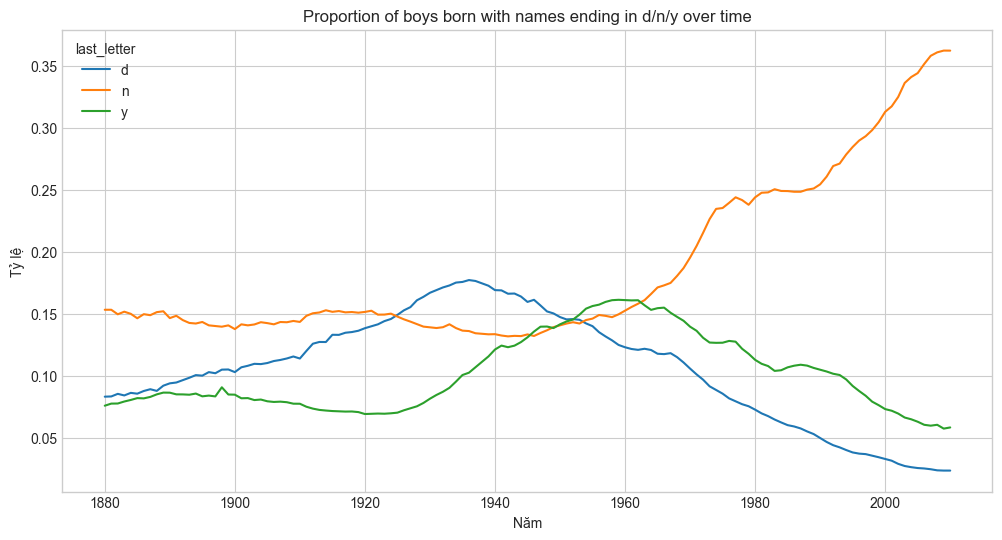

In [51]:
# 1. Chuẩn hóa lại toàn bộ 'table' (chứa tất cả các năm)
letter_prop_full = table / table.sum()

# 2. Lọc ra các chữ 'd', 'n', 'y' cho giới tính Nam ('M')
#    Sau đó chuyển vị (.T) để các năm trở thành index
dny_ts = letter_prop_full.loc[['d', 'n', 'y'], 'M'].T

# Hiển thị 5 dòng đầu của time series
print("Time series của tỷ lệ tên nam kết thúc bằng 'd', 'n', 'y':")
display(dny_ts.head())

# 3. Vẽ biểu đồ đường
dny_ts.plot(
    title='Proportion of boys born with names ending in d/n/y over time',
    figsize=(12, 6)
)
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ')
plt.show()

**Nhận xét Biểu đồ Đường**:

biểu đồ này kể một câu chuyện hấp dẫn về sự thay đổi trong "âm thanh" của tên nam giới ở Mỹ:

- **Đường 'd' (màu xanh):** Tượng trưng cho các tên cổ điển như Richard, Edward, Howard. Nó rất phổ biến và ổn định trong gần một thế kỷ trước khi **lao dốc không phanh** từ những năm 1970.
- **Đường 'y' (màu xanh lá):** Tượng trưng cho các tên như Harry, Roy, Billy. Nó đạt đỉnh vào giữa thế kỷ 20 và sau đó cũng giảm dần độ phổ biến.
- **Đường 'n' (màu cam):** Đây chính là "nhân vật chính" của cuộc cách mạng. Tượng trưng cho các tên hiện đại như Jason, Mason, Logan, Ethan. Bắt đầu từ một vị trí rất thấp, nó đã có một **sự trỗi dậy ngoạn mục** từ khoảng năm 1960 và trở thành một trong những âm cuối thịnh hành nhất vào thế kỷ 21.

**Kết luận:** Phân tích chữ cái cuối đã cho thấy một sự thay đổi văn hóa sâu sắc, từ những cái tên mang âm hưởng cổ điển, mạnh mẽ sang những cái tên có âm kết thúc mềm mại và hiện đại hơn.


### 8. Tên "Lưỡng tính" (Unisex): Sự chuyển đổi giới tính của tên gọi

Một xu hướng thú vị khác là xem xét những cái tên ban đầu phổ biến cho một giới tính nhưng dần dần lại được ưa chuộng hơn cho giới tính còn lại. Một ví dụ kinh điển là cái tên **Leslie** và các biến thể của nó.


In [58]:
# 1. Lấy tất cả các tên duy nhất từ top1000
all_names = pd.Series(top1000['name'].unique())

# 2. Tìm các tên có chứa chuỗi "Lesl"
lesley_like = all_names[all_names.str.contains('Lesl')]
print("Các biến thể của tên 'Leslie' tìm thấy:")
display(lesley_like)

# 3. Lọc DataFrame top1000 để chỉ giữ lại các tên này
filtered = top1000[top1000['name'].isin(lesley_like)]

# 4. Tính tổng số ca sinh cho mỗi biến thể
print("\nTổng số ca sinh của mỗi biến thể của tên 'Leslie':")
display(filtered.groupby('name')['births'].sum())

Các biến thể của tên 'Leslie' tìm thấy:


632     Leslie
2293    Lesley
4263    Leslee
4729     Lesli
6102     Lesly
dtype: object


Tổng số ca sinh của mỗi biến thể của tên 'Leslie':


name
Leslee      1083
Lesley     35041
Lesli        929
Leslie    370585
Lesly      10073
Name: births, dtype: int64

Bây giờ, chúng ta sẽ tạo một bảng tổng hợp theo năm và giới tính, sau đó chuẩn hóa để xem tỷ lệ Nam/Nữ của các tên này thay đổi như thế nào qua từng năm.


In [59]:
# 1. Tạo pivot table đếm số ca sinh theo năm và giới tính
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

# 2. Chuẩn hóa dữ liệu: Chia mỗi hàng cho tổng của chính hàng đó
#    để tính tỷ lệ Nam/Nữ trong mỗi năm.
#    .sum(axis='columns') tính tổng theo hàng.
table = table.div(table.sum(axis='columns'), axis='index')

# 3. Hiển thị 5 dòng cuối của bảng tỷ lệ
print("Bảng tỷ lệ Nam/Nữ của các tên 'Lesley-like' qua các năm (5 năm cuối):")
display(table.tail())

Bảng tỷ lệ Nam/Nữ của các tên 'Lesley-like' qua các năm (5 năm cuối):


sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


Cuối cùng, ta sẽ vẽ biểu đồ để trực quan hóa sự chuyển đổi giới tính này.


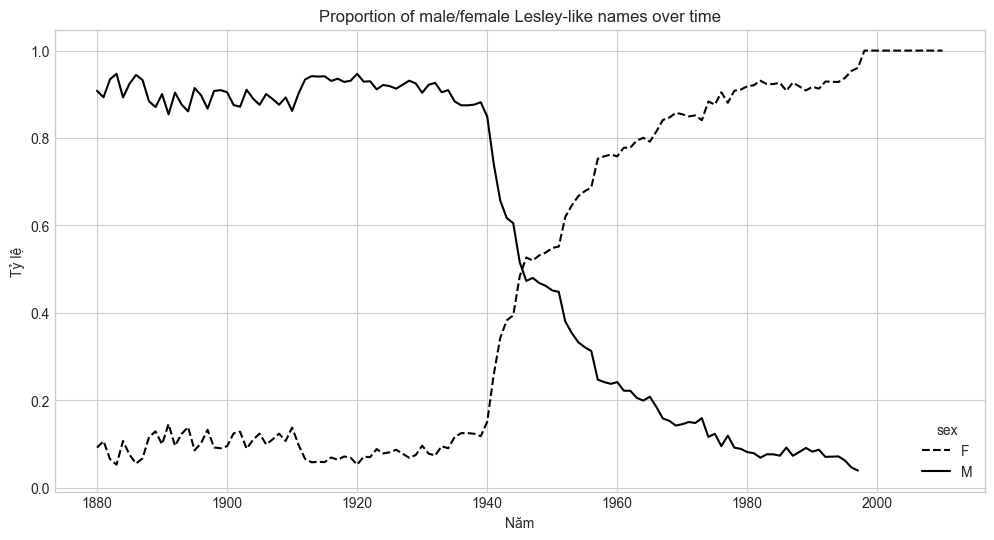

In [60]:
# Vẽ biểu đồ đường thể hiện sự thay đổi tỷ lệ
# style={'M': 'k-', 'F': 'k--'} định dạng: Nam là đường liền, Nữ là đường đứt nét
table.plot(
    style={'M': 'k-', 'F': 'k--'},
    title='Proportion of male/female Lesley-like names over time',
    figsize=(12, 6)
)
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ')
plt.show()

**Nhận xét việc phân tích tên "Leslie"**:

Biểu đồ trên kể một câu chuyện hấp dẫn và cực kỳ rõ ràng:

- **Giai đoạn đầu (1880 - ~1930):** "Leslie" và các biến thể của nó **chủ yếu là một cái tên dành cho nam giới**. Đường liền (M) ở mức rất cao, trong khi đường đứt nét (F) gần như bằng 0.
- **Giai đoạn chuyển giao (~1940 - ~1960):** Đây là thời kỳ "lưỡng tính" thực sự, khi cái tên này bắt đầu trở nên phổ biến cho cả nữ giới. Hai đường tiệm cận và cắt nhau, cho thấy một sự cân bằng tạm thời về giới tính cho cái tên này.
- **Giai đoạn hiện đại (sau 1960):** "Leslie" đã **gần như hoàn toàn trở thành một cái tên nữ**. Đường của nam (M) lao dốc xuống 0, trong khi đường của nữ (F) tăng vọt lên mức 1.0 (100%).

Đây là một minh chứng xuất sắc cho thấy tên gọi không phải là bất biến mà có thể thay đổi sâu sắc về mặt văn hóa và giới tính theo thời gian.


### 9. Tổng kết

Qua hành trình phân tích bộ dữ liệu Tên trẻ em Hoa Kỳ, chúng ta đã cùng nhau thấy được một câu chuyện đa chiều về lịch sử-xã hội nước Mỹ:

1.  **Toàn cảnh:** Ta đã thấy các xu hướng sinh sản chung phản ánh các sự kiện lịch sử lớn như **Baby Boom**.
2.  **Sự đa dạng hóa:** Ta đã chứng minh được rằng việc đặt tên ngày càng trở nên **đa dạng hơn**, các bậc cha mẹ có xu hướng chọn những cái tên độc đáo thay vì chỉ bám theo top đầu.
3.  **Cuộc "cách mạng" âm cuối:** Ta khám phá ra một sự thay đổi tinh tế nhưng mạnh mẽ trong "âm thanh" của tên nam giới, với sự suy tàn của các âm cuối truyền thống (`-d`, `-s`) và sự trỗi dậy của các âm cuối hiện đại (`-n`).
4.  **Tính linh hoạt của tên gọi:** Cuối cùng, chúng ta thấy rằng ngay cả "giới tính" của một cái tên cũng có thể thay đổi theo dòng chảy văn hóa.
